PBDE Simulation (newest code by Susan) analysis :D

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [3]:
volume = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')['volume']

In [4]:
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_5_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_20_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0172022_run_60_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_90_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_91_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_366_days.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days_no_buried.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_60_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_5e-4_upwards_from_bottom_added.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_90_days_no_buried_tau_crit_5e-3_upwards_from_bottom_added.zarr')
#data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_updated_added.zarr')
data = xr.open_dataset('/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr')
#
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
data.z

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.DataArray 'z' (trajectory: 360, obs: 2190)> Size: 6MB
[788400 values with dtype=float64]
Coordinates:
  * obs         (obs) int32 9kB 0 1 2 3 4 5 6 ... 2184 2185 2186 2187 2188 2189
  * trajectory  (trajectory) int64 3kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

Text(0, 0.5, 'Status')

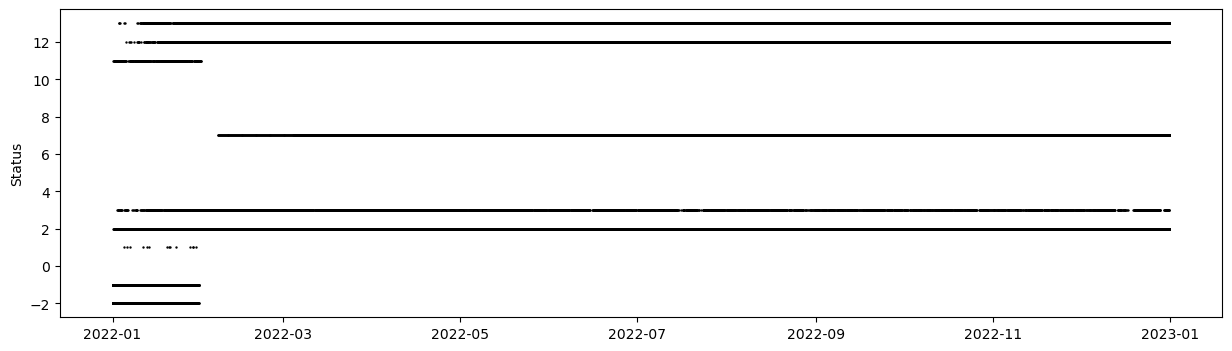

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.scatter(data.time, data.status, s = .5, c = 'k')
ax.set_ylabel('Status')

Proportions of total amount of particles along the simulation

In [6]:
#
colloidal_water = []
marine_water = [] 
sewage_water = []
initial = []
colloidal_sediment = []
marine_sediment = []
sewage_sediment = []
colloidal_buried = []
marine_buried = []
sewage_buried = []
total = []
#
for i in range(len(data.obs)):
    len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
    len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
    len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
    len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
    len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
    len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
    len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
    #
    len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
    #
    colloidal_water.append(len_2)
    marine_water.append(len_3) 
    sewage_water.append(len_1)
    initial.append(len_initial)
    colloidal_sediment.append(len_12)
    marine_sediment.append(len_13)
    sewage_sediment.append(len_11)
    total.append(len_T)
#    
proportion_initial = np.array(initial)/np.array(total) *100
#
proportion_colloidal_water = np.array(colloidal_water)/np.array(total) *100
proportion_marine_water = np.array(marine_water)/np.array(total) *100
proportion_sewage_water = np.array(sewage_water)/np.array(total) *100
#
proportion_colloidal_sediment = np.array(colloidal_sediment)/np.array(total) *100
proportion_marine_sediment = np.array(marine_sediment)/np.array(total) *100
proportion_sewage_sediment = np.array(sewage_sediment)/np.array(total) *100

In [7]:
def proportions_particles(data):
    colloidal_water = []
    marine_water = [] 
    sewage_water = []
    initial = []
    colloidal_sediment = []
    marine_sediment = []
    sewage_sediment = []
    particles_out = []
    total = []
    #
    for i in range(len(data.obs)):
        len_initial = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] < 0.))[0])
        len_1 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 1.))[0])
        len_2 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 2.))[0])
        len_3 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 3.))[0])
        len_11 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 11.))[0])
        len_12 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 12.))[0])
        len_13 = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 13.))[0])
        len_out = len(np.where(np.isfinite(data.status[:, i]) & (data.status[:, i] == 7.))[0])
        #
        len_T = np.count_nonzero(~np.isnan(data.status[:, i]))
        #
        colloidal_water.append(len_2)
        marine_water.append(len_3) 
        sewage_water.append(len_1)
        initial.append(len_initial)
        colloidal_sediment.append(len_12)
        marine_sediment.append(len_13)
        sewage_sediment.append(len_11)
        particles_out.append(len_out)
        total.append(len_T)
    #    
    proportion_initial = np.array(initial)/np.array(total)
    #
    p_colloidal_water = np.array(colloidal_water)/np.array(total)
    p_marine_water = np.array(marine_water)/np.array(total)
    p_sewage_water = np.array(sewage_water)/np.array(total)
    #
    p_colloidal_sediment = np.array(colloidal_sediment)/np.array(total)
    p_marine_sediment = np.array(marine_sediment)/np.array(total)
    p_sewage_sediment = np.array(sewage_sediment)/np.array(total)
    #
    p_out = np.array(particles_out)/np.array(total)
    #
    return p_colloidal_water, p_marine_water, p_sewage_water, p_colloidal_sediment, p_marine_sediment, p_sewage_sediment, p_out

Proportions of particles in water vs sediment vs buried

In [8]:
proportion_water = proportion_sewage_water + proportion_colloidal_water + proportion_marine_water
proportion_sediment = proportion_sewage_sediment + proportion_colloidal_sediment + proportion_marine_sediment


Proportions between status at all states

In [9]:
proportion_sewage = proportion_sewage_water + proportion_sewage_sediment 
proportion_colloidal = proportion_colloidal_water + proportion_colloidal_sediment 
proportion_marine = proportion_marine_water + proportion_marine_sediment 

(-5.0, 105.0)

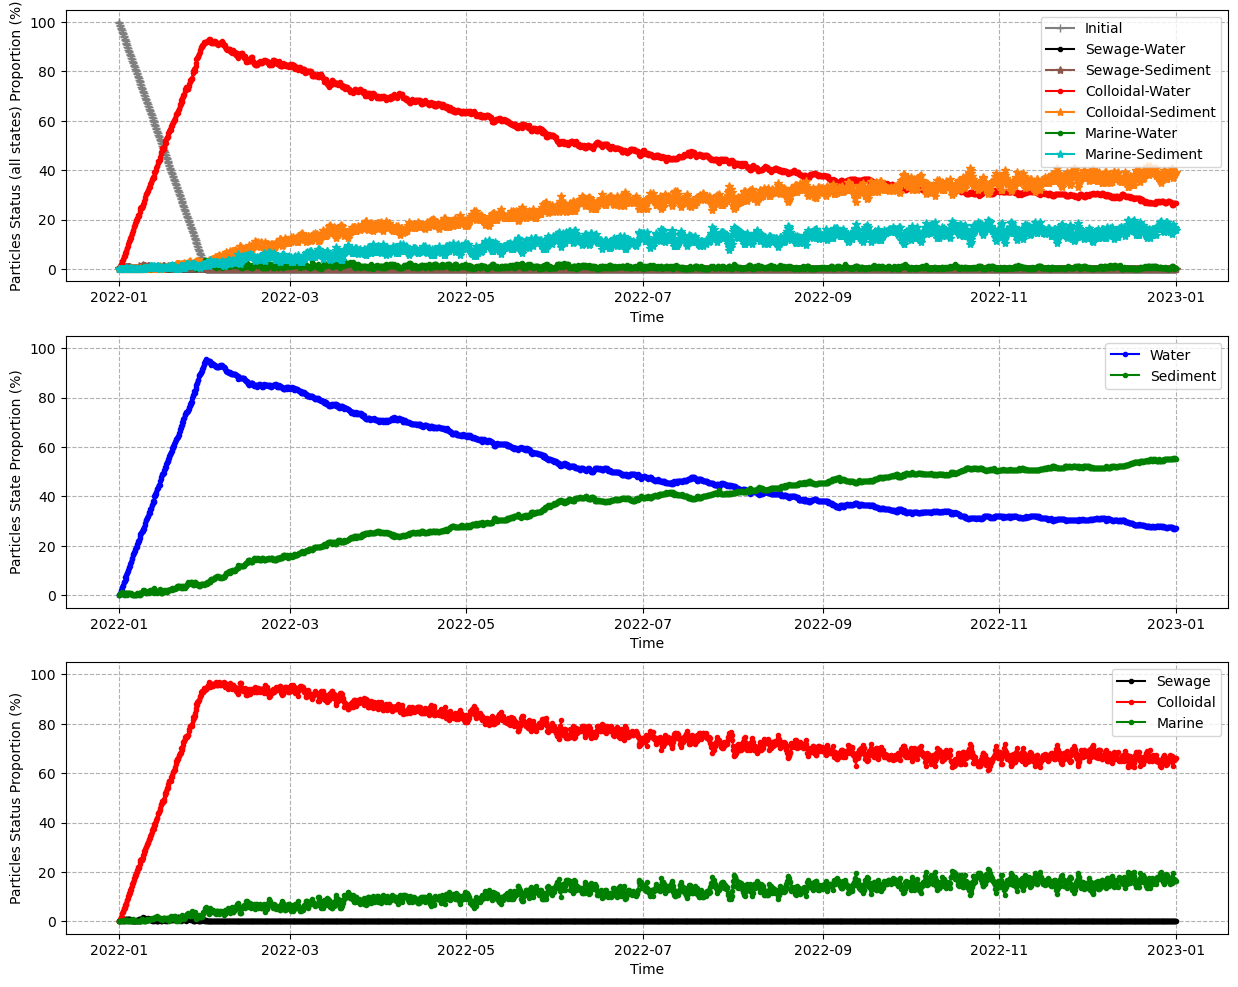

In [10]:
time_axis = data.time[0,:]
fig, ax = plt.subplots(3,1,figsize = (15,12))
# initial
ax[0].plot(time_axis, proportion_initial, '+-' ,c = 'tab:grey', label = 'Initial')
# Sewage particles in the water column
ax[0].plot(time_axis, proportion_sewage_water, '.-' ,c = 'k', label = 'Sewage-Water')
ax[0].plot(time_axis, proportion_sewage_sediment, '*-' , c = 'tab:brown', label = 'Sewage-Sediment')
#
#  Colloidal particles in the water column
ax[0].plot(time_axis, proportion_colloidal_water, '.-' ,c = 'r', label = 'Colloidal-Water')
ax[0].plot(time_axis, proportion_colloidal_sediment, '*-' , c = 'tab:orange', label = 'Colloidal-Sediment')
#
# Marine particles in the water column
ax[0].plot(time_axis, proportion_marine_water, '.-' ,c = 'g', label = 'Marine-Water')
ax[0].plot(time_axis, proportion_marine_sediment, '*-' , c = 'c', label = 'Marine-Sediment')
#
ax[0].legend()
ax[0].grid(linestyle = '--')
#
ax[0].set_ylabel('Particles Status (all states) Proportion (%)')
ax[0].set_xlabel('Time')
#
ax[0].set_ylim([-5,105])
###################################################
ax[1].plot(time_axis, proportion_water, '.-b', label = 'Water')
ax[1].plot(time_axis, proportion_sediment, '.-g', label = 'Sediment')
#
ax[1].legend()
ax[1].grid(linestyle = '--')
ax[1].set_ylabel('Particles State Proportion (%)')
ax[1].set_xlabel('Time')
ax[1].set_ylim([-5,105])
###################################################
ax[2].plot(time_axis, proportion_sewage, '.-k', label = 'Sewage')
ax[2].plot(time_axis, proportion_colloidal, '.-r', label = 'Colloidal')
ax[2].plot(time_axis, proportion_marine, '.-g' , label = 'Marine')
ax[2].legend()
ax[2].grid(linestyle = '--')
ax[2].set_ylabel('Particles Status Proportion (%)')
ax[2].set_xlabel('Time')
ax[2].set_ylim([-5,105])

Counts (number of particles)

360


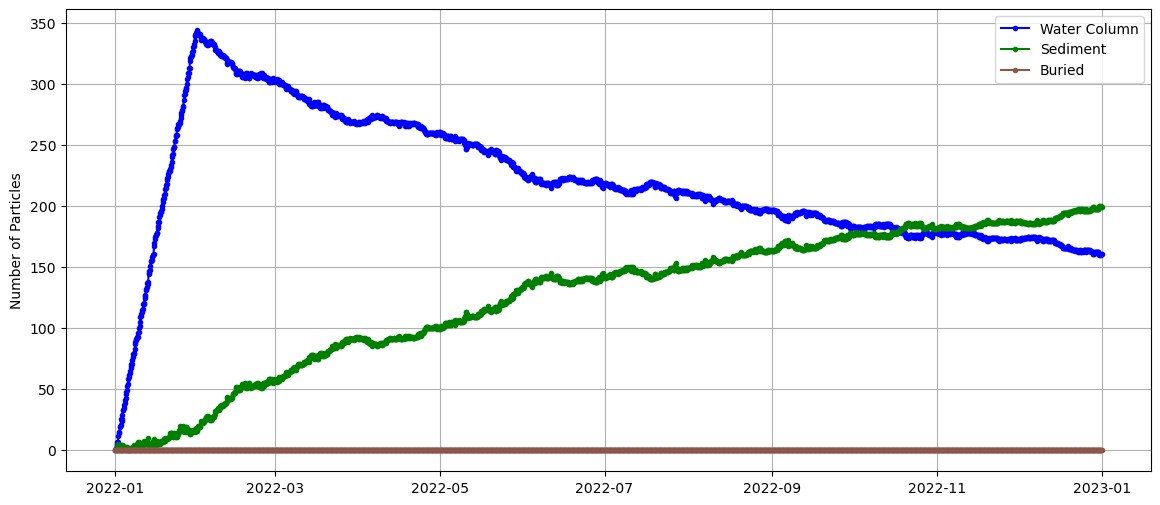

In [11]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(time_axis, np.count_nonzero((data.status < 10) & (data.status > 0), axis=0),'.-' ,c ='b', label = 'Water Column')
ax.plot(time_axis, np.count_nonzero((data.status < 20) & (data.status > 10), axis=0),'.-' ,c ='g', label = 'Sediment')
ax.plot(time_axis, np.count_nonzero(data.status > 20, axis=0),'.-' ,c ='tab:brown', label = 'Buried')
ax.legend()
ax.grid()
ax.set_ylabel('Number of Particles')
print(data.status.shape[0])

/tmp/ipykernel_245455/1182615118.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_245455/1182615118.py:3: RuntimeWarning: invalid value encountered in divide
  ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
/tmp/ipykernel_245455/1182615118.py:8: RuntimeWarning: invalid value encountered in divide
  axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')


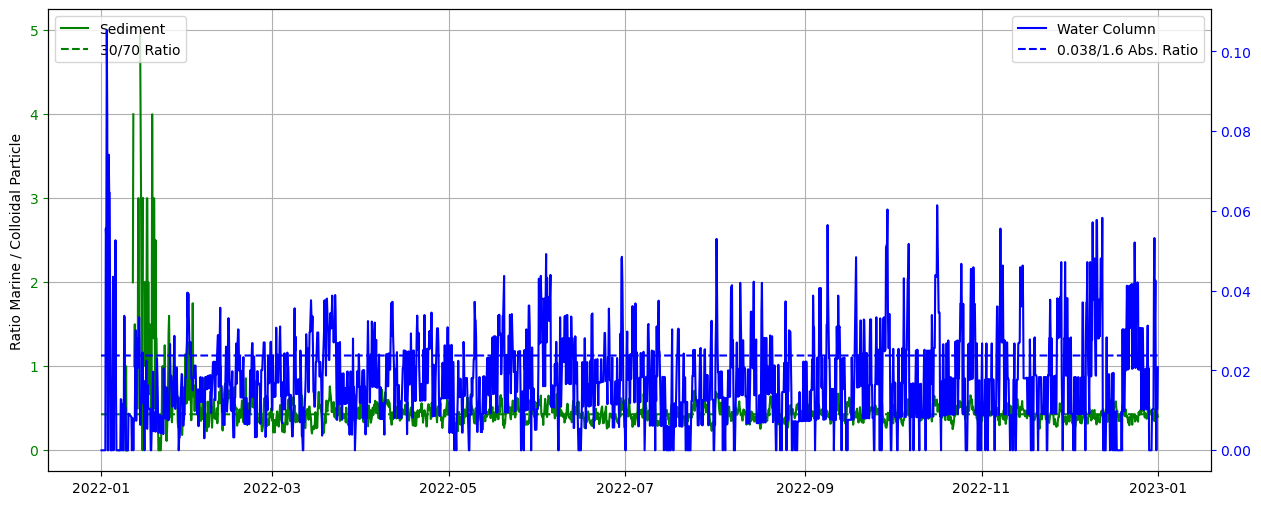

In [12]:
# Ratios in water column, sediment and buried
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(time_axis,proportion_marine_sediment / proportion_colloidal_sediment, label='Sediment', c = 'g')
ax.plot(data.time[0, :], 30/70. * np.ones_like(data.status[0, :]), '--', c='g', label = '30/70 Ratio')

#ax.plot(time_axis, proportion_marine_buried / proportion_colloidal_buried, label='Buried', c = 'tab:brown')
axins = ax.twinx()
axins.plot(time_axis, proportion_marine_water / proportion_colloidal_water, label='Water Column', c = 'b')
axins.plot(data.time[0, :], 0.038/1.6 * np.ones_like(data.status[0, :]), '--', c='b', label = '0.038/1.6 Abs. Ratio')
#
ax.tick_params(axis='y', colors='green')
axins.tick_params(axis='y', colors='blue')

#
ax.set_ylabel('Ratio Marine / Colloidal Particle')
ax.grid();
ax.legend(loc = 'upper left');
axins.legend(loc = 'upper right');

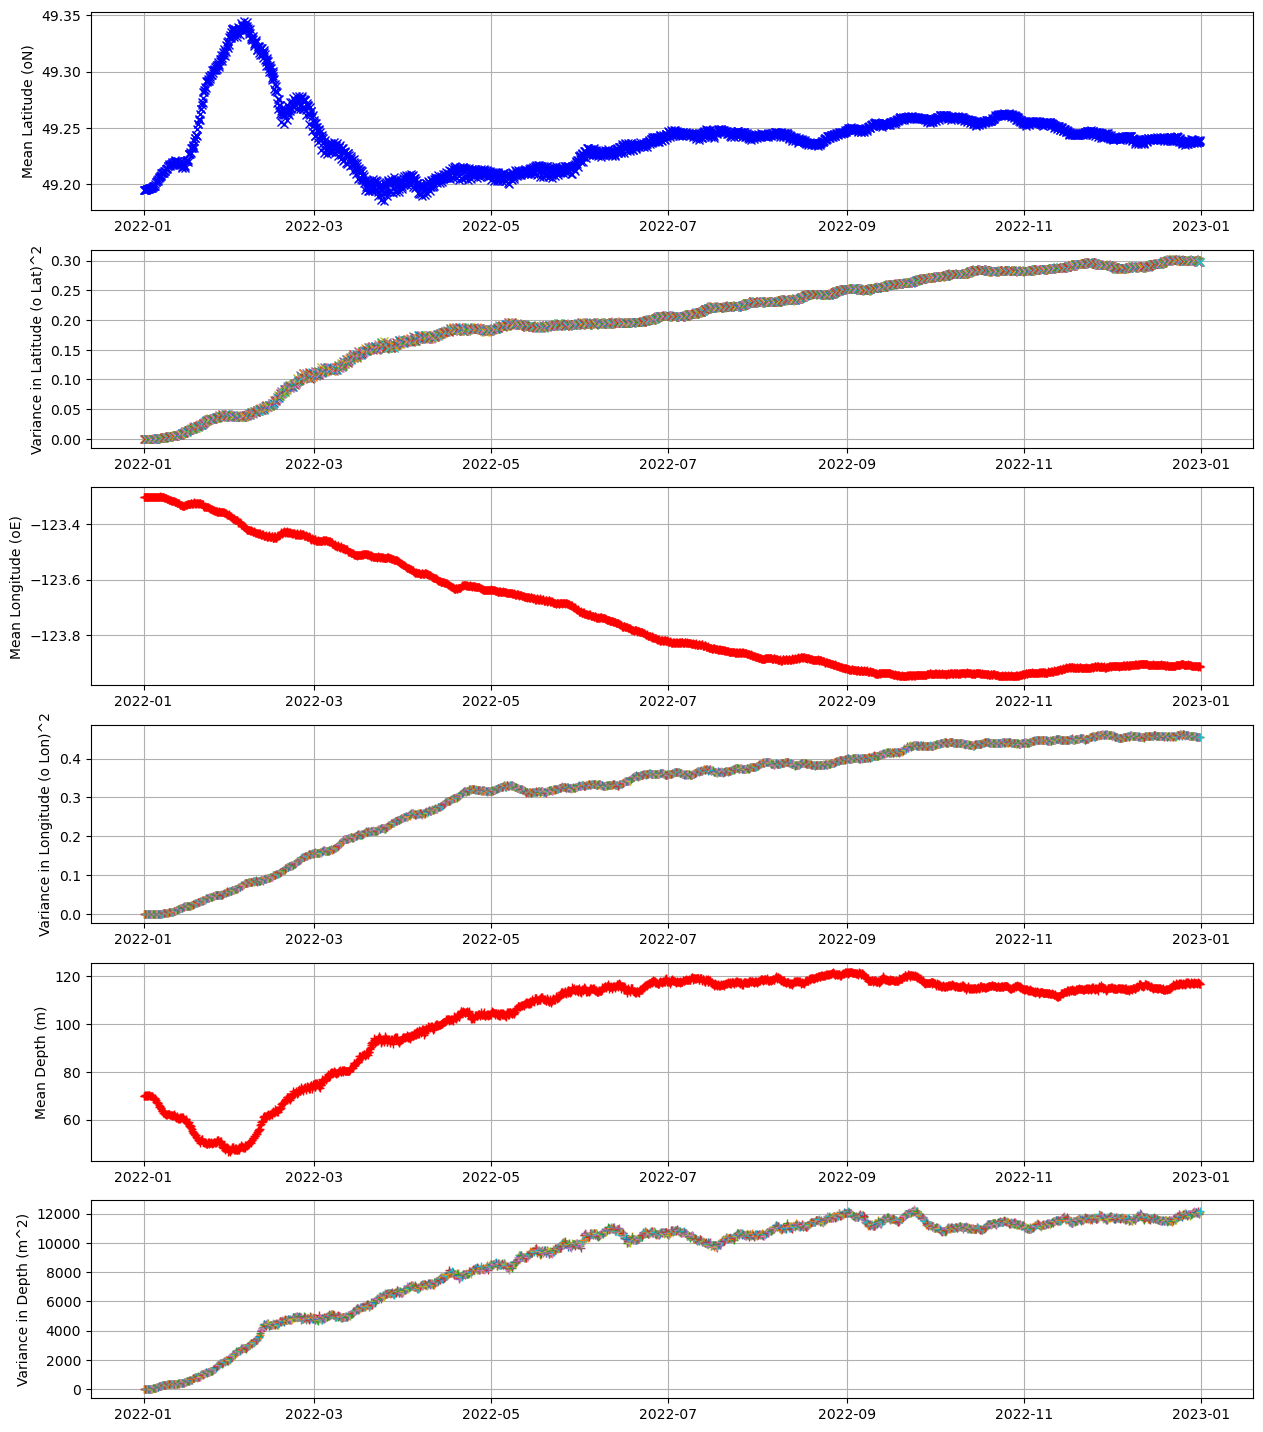

In [13]:
fig, axs = plt.subplots(6, 1, figsize=(15, 18))
for jj in range(nobs):
    y = data.lat[:, jj].mean()
    yvar = data.lat[:, jj].var()
    x = data.lon[:, jj].mean()
    xvar = data.lon[:, jj].var()
    z = data.z[:, jj].mean()
    zvar = data.z[:, jj].var()
    axs[0].plot(data.time[0, jj], y, 'bx')
    #axs[0].set_ylim(49.3, 49.31)
    axs[0].set_ylabel('Mean Latitude (oN)')
    axs[1].plot(data.time[0, jj], yvar, 'x')
    #axs[1].set_ylim(0.01, 0.03)
    axs[1].set_ylabel('Variance in Latitude (o Lat)^2')
    axs[2].plot(data.time[0, jj], x, 'r+')
    #axs[2].set_ylim(-123.37, -123.35)
    axs[2].set_ylabel('Mean Longitude (oE)')
    axs[3].plot(data.time[0, jj], xvar, '+')
    #axs[3].set_ylim(0.05, 0.07)
    axs[3].set_ylabel('Variance in Longitude (o Lon)^2')   
    axs[4].plot(data.time[0, jj], z, 'r+')
    #axs[4].set_ylim(80, 90)
    axs[4].invert_yaxis()
    axs[4].set_ylabel('Mean Depth (m)')
    axs[5].plot(data.time[0, jj], zvar, '+')
    #axs[5].set_ylim(3000, 5000)
    axs[5].set_ylabel('Variance in Depth (m^2)')
for ax in axs:
    ax.grid()

In [14]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

/tmp/ipykernel_245455/1766203613.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


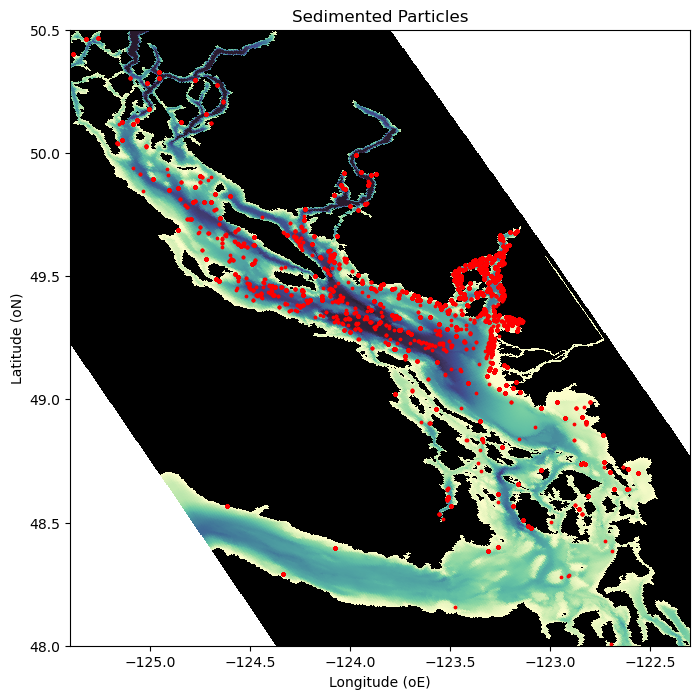

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-125.4, -122.3)
ax.set_ylim(48, 50.5);
#for ii in range(ntraj):
#    y = data.lat[ii]
#    x = data.lon[ii]
#    ax.plot(x, y, '.-', alpha=0.4);
#    if data.status[ii, -1] > 10:
#        ax.plot(data.lon[ii, -1], data.lat[ii, -1], 'ob', zorder=5);
#
ax.scatter(data.lon.where(data.status > 10), data.lat.where(data.status > 10), c ='r', s =3)
ax.set_title('Sedimented Particles');
ax.set_ylabel('Latitude (oN)')
ax.set_xlabel('Longitude (oE)');

In [16]:
#fig, ax = plt.subplots(1, 1)
#for ii in range(ntraj):
#    y = data.z[ii, :]
#    x = data.lat[ii, :]
#    plt.plot(x, y, '.-', alpha=0.2);
#    if data.status[ii, -1] > 10:
#        ax.plot(data.lat[ii, -1], data.z[ii, -1], '+k', markersize=15, zorder=5);
#
#ax.invert_yaxis();
#ax.set_title('Spagetti Plot, lat/z');
#ax.set_ylabel('Depth (m)')
#ax.set_xlabel('Latitude (oN)');

$\frac{dC}{dt} = - \alpha \cdot C + Q$

From Roger --> $C_s = Q \cdot year$

$\alpha \cdot C_s = Q$ --> $\alpha \cdot Q \cdot year = Q$

$\alpha = year^{-1}$

Solution:

$C = C_s \cdot (1 - exp^{-\alpha \cdot t})$

Function for checking acumulative particles in the water column

In [17]:
def plot_cumulative_watercolumn_particles(filename, release_freq, output_res, plot=True):
    # Load dataset
    data = xr.open_dataset(filename)
    time = data.time[0, 0].values 
    start_time = pd.to_datetime(time)
    #
    go_back = data.status.shape[1]
    number_in_watercolumn = np.zeros(go_back)
    for it in range(go_back):
        positive = data.status[:, it][data.status[:, it] > 0]
        number_in_watercolumn[it] = positive.values[positive.values < 10].shape[0]

    # time index and get monthly indices
    time_index = pd.date_range(start=start_time, periods=data.time.shape[1], freq=f'{output_res}H')
    df_time = pd.DataFrame(index=time_index)
    df_time['datetime'] = df_time.index  
    last_times = df_time.resample('M').last()['datetime']
    indices = df_time[df_time['datetime'].isin(last_times)].index.to_list()
    integer_indices = [df_time.index.get_loc(ts) for ts in indices]
    idx = [0] + integer_indices

    #theoretical concentration
    C_initial = (365 * 86400) / release_freq
    alpha = 1 / (365 * 86400 / (3600 * output_res))
    tt = np.arange(0, len(data.time[1]))
    C = C_initial * (1 - np.exp(-alpha * tt))

    # cumulative line using monthly pulses
    cumulative = np.zeros_like(number_in_watercolumn)
    for j in range(len(idx)):
        start = idx[j]
        end = len(number_in_watercolumn)
        pulse_length = end - start
        next = np.zeros_like(number_in_watercolumn)
        next[start:] = number_in_watercolumn[:pulse_length]
        cumulative += next

    #
    df_out = pd.DataFrame({
        'goal': C,
        'cumulative': cumulative
    }, index=time_index)
    df_out.index.name = 'datetime'

    #
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(15, 4))
        ax.plot(df_out.index, df_out['cumulative'], label='Cumulative (monthly)')
        ax.plot(df_out.index, df_out['goal'], 'k', label='Theoretical Goal')
        ax.set_title('Cumulative Water Column Particles vs Theoretical Goal')
        ax.set_xlabel('Time')
        ax.set_ylabel('Particle Count')
        ax.grid()
        ax.legend()

    print('Goal (theoretical max concentration):', int(C[-1]))
    print('We are getting (final cumulative value):', int(cumulative[-1]))

    return df_out

Try to get the same with different restart files

In [18]:
def compute_cumulative_from_multiple_runs(file_list, release_freq, output_res, plot=True):
    all_number_in_watercolumn = []
    all_time = []
    dataset_start_times = [] 

    for file in file_list:
        data = xr.open_dataset(file)
        time = pd.to_datetime(data.time[0, 0].values)
        time_index = pd.date_range(start=time, periods=data.time.shape[1], freq=f'{output_res}H')

        # Ensuring timeindex does not overlap
        if all_time and time_index[0] <= all_time[-1][-1]:
            offset = all_time[-1][-1] + pd.Timedelta(hours=output_res)
            time_index = pd.date_range(start=offset, periods=data.time.shape[1], freq=f'{output_res}H')

        dataset_start_times.append(time_index[0])  

        #Count particles in water column
        number_in_watercolumn = np.zeros(data.status.shape[1])
        for it in range(data.status.shape[1]):
            positive = data.status[:, it][data.status[:, it] > 0]
            number_in_watercolumn[it] = positive.values[positive.values < 10].shape[0]

        all_number_in_watercolumn.append(number_in_watercolumn)
        all_time.append(time_index)

    # 2) Concatenate to join the monthly runs
    full_number_in_watercolumn = np.concatenate(all_number_in_watercolumn)
    full_time_index = pd.DatetimeIndex(np.concatenate(all_time))
    #
    df_time = pd.DataFrame({'datetime': full_time_index, 'val': full_number_in_watercolumn})
    df_time.index = pd.DatetimeIndex(full_time_index)
    df_time = df_time[~df_time.index.duplicated(keep='first')]

    # Take monthly  
    last_times = df_time.resample('M').last()['datetime']
    integer_indices = df_time.index.get_indexer(last_times)
    idx = [0] + list(integer_indices)

    # 4) Theoretical cumulative
    C_initial = (365 * 86400) / release_freq
    alpha = 1 / (365 * 86400 / (3600 * output_res))
    tt = np.arange(0, len(df_time))
    C = C_initial * (1 - np.exp(-alpha * tt))

    # monthly cumulative
    cumulative = np.zeros(len(df_time))
    for j in range(len(idx)):
        start = idx[j]
        end = len(df_time)
        pulse_length = end - start
        next = np.zeros(len(df_time))
        next[start:] = df_time['val'].values[:pulse_length]
        cumulative += next

    # Final in pandas
    df_out = pd.DataFrame({
        'goal': C,
        'cumulative': cumulative
    }, index=df_time.index)
    df_out.index.name = 'datetime'
    # PLOTS
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(15, 4))
        ax.plot(df_out.index, df_out['cumulative'], 'b', label='Cumulative (monthly)')
        ax.plot(df_out.index, df_out['goal'], 'k', label='Theoretical Goal')
        ax.set_title('Cumulative Water Column Particles Across Runs')
        ax.set_xlabel('Time')
        ax.set_ylabel('Particle Count')
        ax.grid()
        ax.legend()

        # Vertical lines at each new dataset start
        for t in dataset_start_times[1:]:
            ax.axvline(t, color='red', linestyle='--', linewidth=1, alpha=0.7)

    print('Goal (theoretical max):', int(C[-1]))
    print('We are getting (final cumulative):', int(cumulative[-1]))

    return df_out

In [19]:
file_list = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_31_days__tau_crit_1e-2_upwards_month_1.zarr',
             '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_31_days__tau_crit_1e-2_upwards_month_1_restart_31_days.zarr',
             '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_31_days__tau_crit_1e-2_upwards_month_1_restart_31_days_restart_31_days.zarr',
             '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_31_days__tau_crit_1e-2_upwards_month_1_restart_31_days_restart_31_days_restart_31_days.zarr',
             '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_31_days__tau_crit_1e-2_upwards_month_1_restart_31_days_restart_31_days_restart_31_days_restart_31_days.zarr']

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/tmp/ipykernel_245455/3733434338.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=time, periods=data.time.shape[1], freq=f'{output_res}H')
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while 

Goal (theoretical max): 1514
We are getting (final cumulative): 1457
Goal (theoretical max concentration): 2767
We are getting (final cumulative value): 2705


/tmp/ipykernel_245455/2058042400.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start=start_time, periods=data.time.shape[1], freq=f'{output_res}H')
/tmp/ipykernel_245455/2058042400.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  last_times = df_time.resample('M').last()['datetime']


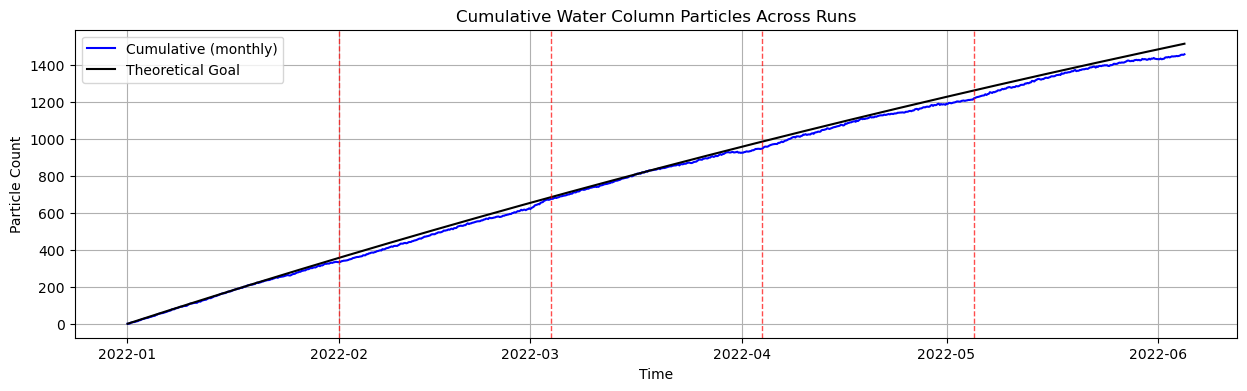

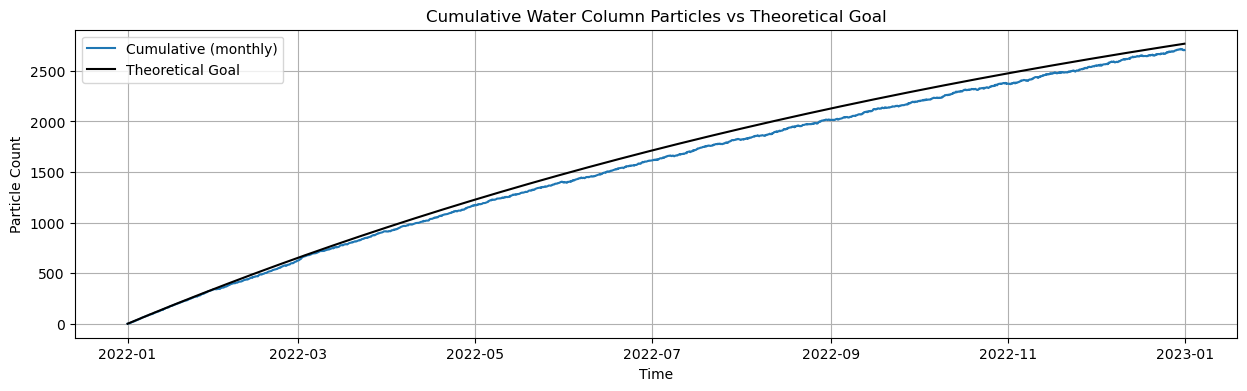

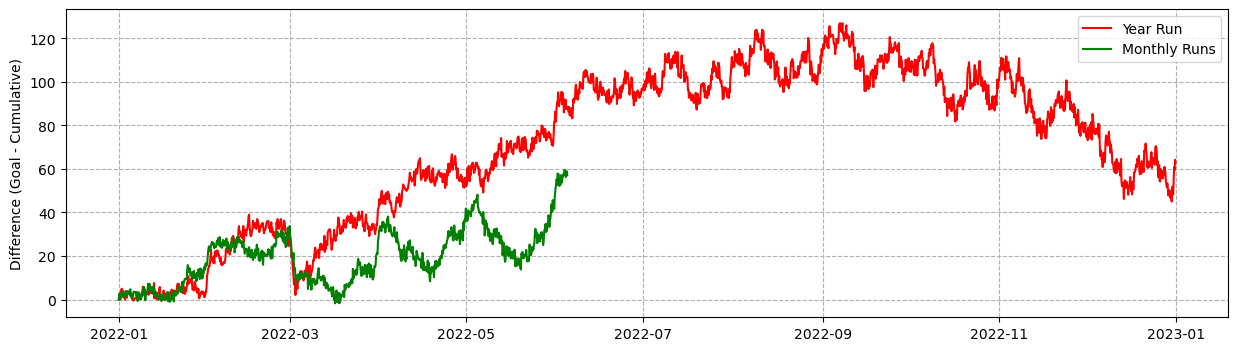

In [20]:
caquita = compute_cumulative_from_multiple_runs(file_list=file_list, release_freq=7200, output_res=4, plot = True)
curves_year = plot_cumulative_watercolumn_particles(filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_no_buried_tau_crit_1e-2_upwards_testing.zarr'
                                      , release_freq=7200, output_res=4, plot=True)
#
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(curves_year['goal'] - curves_year['cumulative'], 'r', label = 'Year Run')
ax.plot(caquita['goal'] - caquita['cumulative'], 'g', label = 'Monthly Runs')
#
ax.set_ylabel('Difference (Goal - Cumulative)')
ax.grid(linestyle = '--')
ax.legend()

**HALF YEAR RUN AND RESTART RUNS**

In [21]:
# Run different restart runs from the 6 months run and use the function to see how they evolve :D
restart_files_half_year = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_half_year.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_tau_0_01.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_tau_0_005.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_tau_crit_0.025.zarr']
# tau_crit = 0.005 and tau_crit = 0.025
base_file = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_half_year.zarr'
colors = ['k', 'b', 'g', 'r']
labels=['Theoretical Goal','Base Run', 'tau_crit = 0.005', 'tau_crit = 0.25']

In [22]:

def number_particles(filename):
    data = xr.open_zarr(filename)
    status = data.status 
    time_axis = data.time[0, :].values

    is_valid = np.isfinite(status)

    # 
    masks = {
        "sewage_water": status == 1,
        "colloidal_water": status == 2,
        "marine_water": status == 3,
        "sewage_sediment": status == 11,
        "colloidal_sediment": status == 12,
        "marine_sediment": status == 13,
        "initial": status < 0,
        "out": status == 7
    }

    #
    counts = {
        key: np.logical_and(is_valid, mask).sum(dim="trajectory").values
        for key, mask in masks.items()
    }

    total = is_valid.sum(dim="trajectory").values

    #
    df = pd.DataFrame({
        "sewage_water": counts["sewage_water"],
        "colloidal_water": counts["colloidal_water"],
        "marine_water": counts["marine_water"],
        "sewage_sediment": counts["sewage_sediment"],
        "colloidal_sediment": counts["colloidal_sediment"],
        "marine_sediment": counts["marine_sediment"],
        "initial": counts["initial"],
        "out": counts["out"],
        "total": total
    }, index=pd.to_datetime(time_axis))

    df.index.name = "time"
    return df


In [23]:
run_0 = number_particles(filename = restart_files_half_year[0])
run_1 = number_particles(filename = restart_files_half_year[1])
run_2 = number_particles(filename = restart_files_half_year[2])
run_3 = number_particles(filename = restart_files_half_year[3])

In [24]:
water_0, sediment_0 =  run_0['sewage_water'] + run_0['colloidal_water'] + run_0['marine_water'] , run_0['sewage_sediment'] + run_0['colloidal_sediment'] + run_0['marine_sediment']
water_1, sediment_1 =  run_1['sewage_water'] + run_1['colloidal_water'] + run_1['marine_water'] , run_1['sewage_sediment'] + run_1['colloidal_sediment'] + run_1['marine_sediment']
water_2, sediment_2 =  run_2['sewage_water'] + run_2['colloidal_water'] + run_2['marine_water'] , run_2['sewage_sediment'] + run_2['colloidal_sediment'] + run_2['marine_sediment']
water_3, sediment_3 =  run_3['sewage_water'] + run_3['colloidal_water'] + run_3['marine_water'] , run_3['sewage_sediment'] + run_3['colloidal_sediment'] + run_3['marine_sediment']

Text(0, 0.5, 'Number of Particles in the sediment')

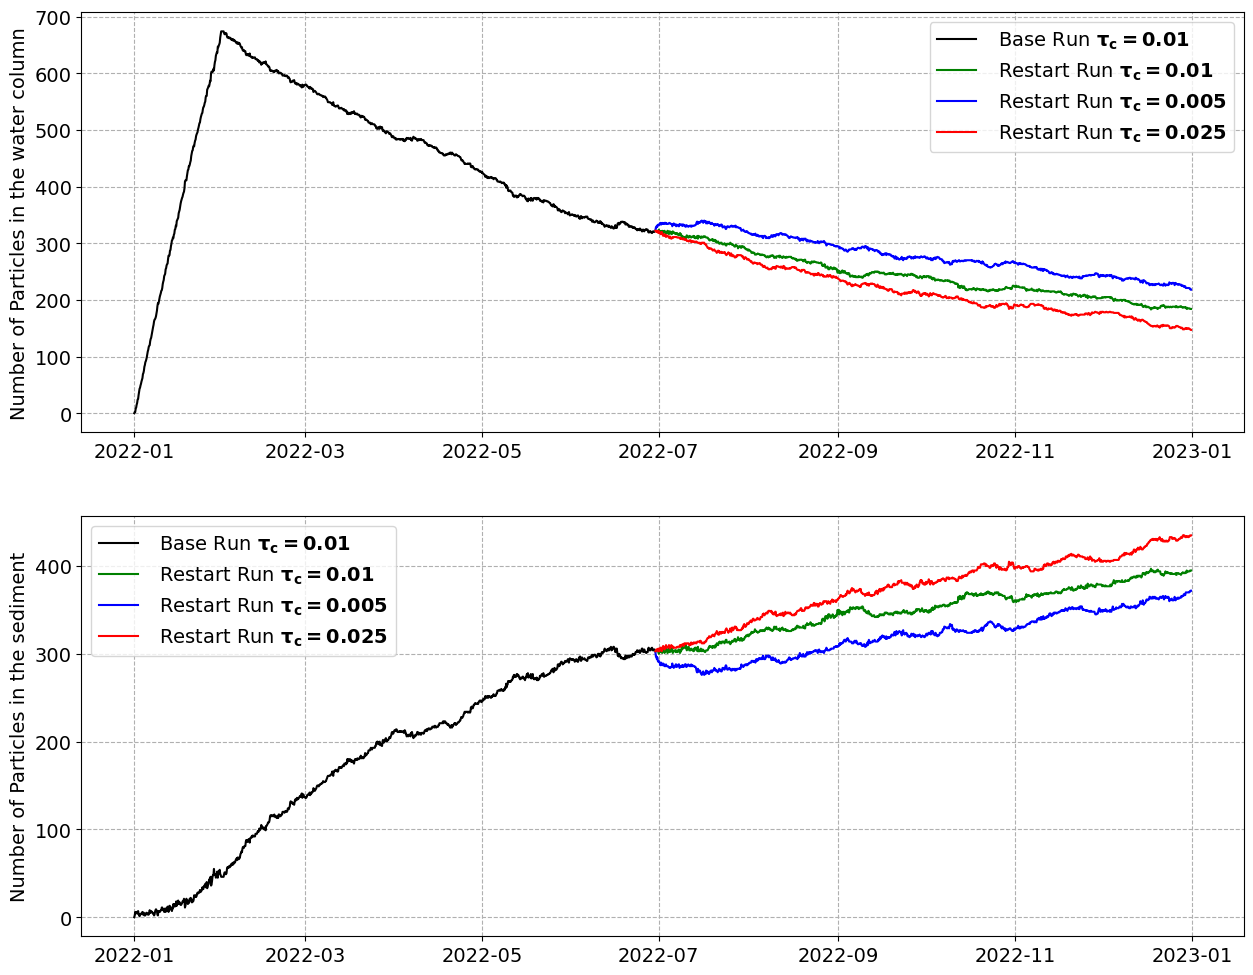

In [25]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2,1,figsize = (15,12))
ax[0].plot(water_0, 'k', label = rf" Base Run $\bf{{\tau_c = 0.01}}$")
ax[0].plot(water_1, 'g', label = rf" Restart Run $\bf{{\tau_c = 0.01}}$")
ax[0].plot(water_2, 'b', label = rf" Restart Run $\bf{{\tau_c = 0.005}}$")
ax[0].plot(water_3, 'r', label = rf" Restart Run $\bf{{\tau_c = 0.025}}$")
#
ax[0].grid(linestyle = '--')
ax[0].legend()
ax[0].set_ylabel('Number of Particles in the water column')
##########################################################################
#
ax[1].plot(sediment_0, 'k', label = rf" Base Run $\bf{{\tau_c = 0.01}}$")
ax[1].plot(sediment_1, 'g', label = rf" Restart Run $\bf{{\tau_c = 0.01}}$")
ax[1].plot(sediment_2, 'b', label = rf" Restart Run $\bf{{\tau_c = 0.005}}$")
ax[1].plot(sediment_3, 'r', label = rf" Restart Run $\bf{{\tau_c = 0.025}}$")
#
ax[1].grid(linestyle = '--')
ax[1].legend()
ax[1].set_ylabel('Number of Particles in the sediment')

Idea of latitude and longitude variance by distance from the source point!!

In [26]:
lat_source = 49.195045
lon_source = -123.301956

In [27]:
def spreading_over_time(filename, source_lon, source_lat, 
                                 tt_step=100, utm_epsg='EPSG:32610'):
    #
    from geopy.distance import geodesic
    from sklearn.decomposition import PCA
    from scipy.spatial import ConvexHull
    from pyproj import Transformer
    #
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    time = data.time[0,:].values
    #
    results = []
    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)

    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        lon_t = lons[:, tt]
        lat_t = lats[:, tt]

        # Remove NaNs
        valid = ~np.isnan(lon_t) & ~np.isnan(lat_t)
        if np.count_nonzero(valid) < 3:
            continue

        lon_t = lon_t[valid]
        lat_t = lat_t[valid]

        # Distance from source (in km)
        distances_km = np.array([
            geodesic((source_lat, source_lon), (lat, lon)).km
            for lat, lon in zip(lat_t, lon_t)
        ])
        mean_dist = np.mean(distances_km)
        std_dist = np.std(distances_km)

        # Project to meters first, then convert to km
        x_m, y_m = transformer.transform(lon_t, lat_t)
        x_km = np.array(x_m) / 1000
        y_km = np.array(y_m) / 1000

        var_x = np.var(x_km)
        var_y = np.var(y_km)

        coords = np.stack([x_km, y_km], axis=1)

        # Convex hull (area in km²)
        try:
            hull = ConvexHull(coords)
            hull_area = hull.volume  # volume in 2D = area
        except Exception:
            hull_area = np.nan

        results.append({
            'time': time[tt],
            'mean_distance_km': mean_dist,
            'std_distance_km': std_dist,
            'var_x_km2': var_x,
            'var_y_km2': var_y,
            'convex_hull_area_km2': hull_area
        })

    df = pd.DataFrame(results).set_index('time')
    return df



In [28]:
spread_data_base = spreading_over_time(filename=restart_files_half_year[0],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R1 = spreading_over_time(filename=restart_files_half_year[1],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R2 = spreading_over_time(filename=restart_files_half_year[2],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R3 = spreading_over_time(filename=restart_files_half_year[3],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

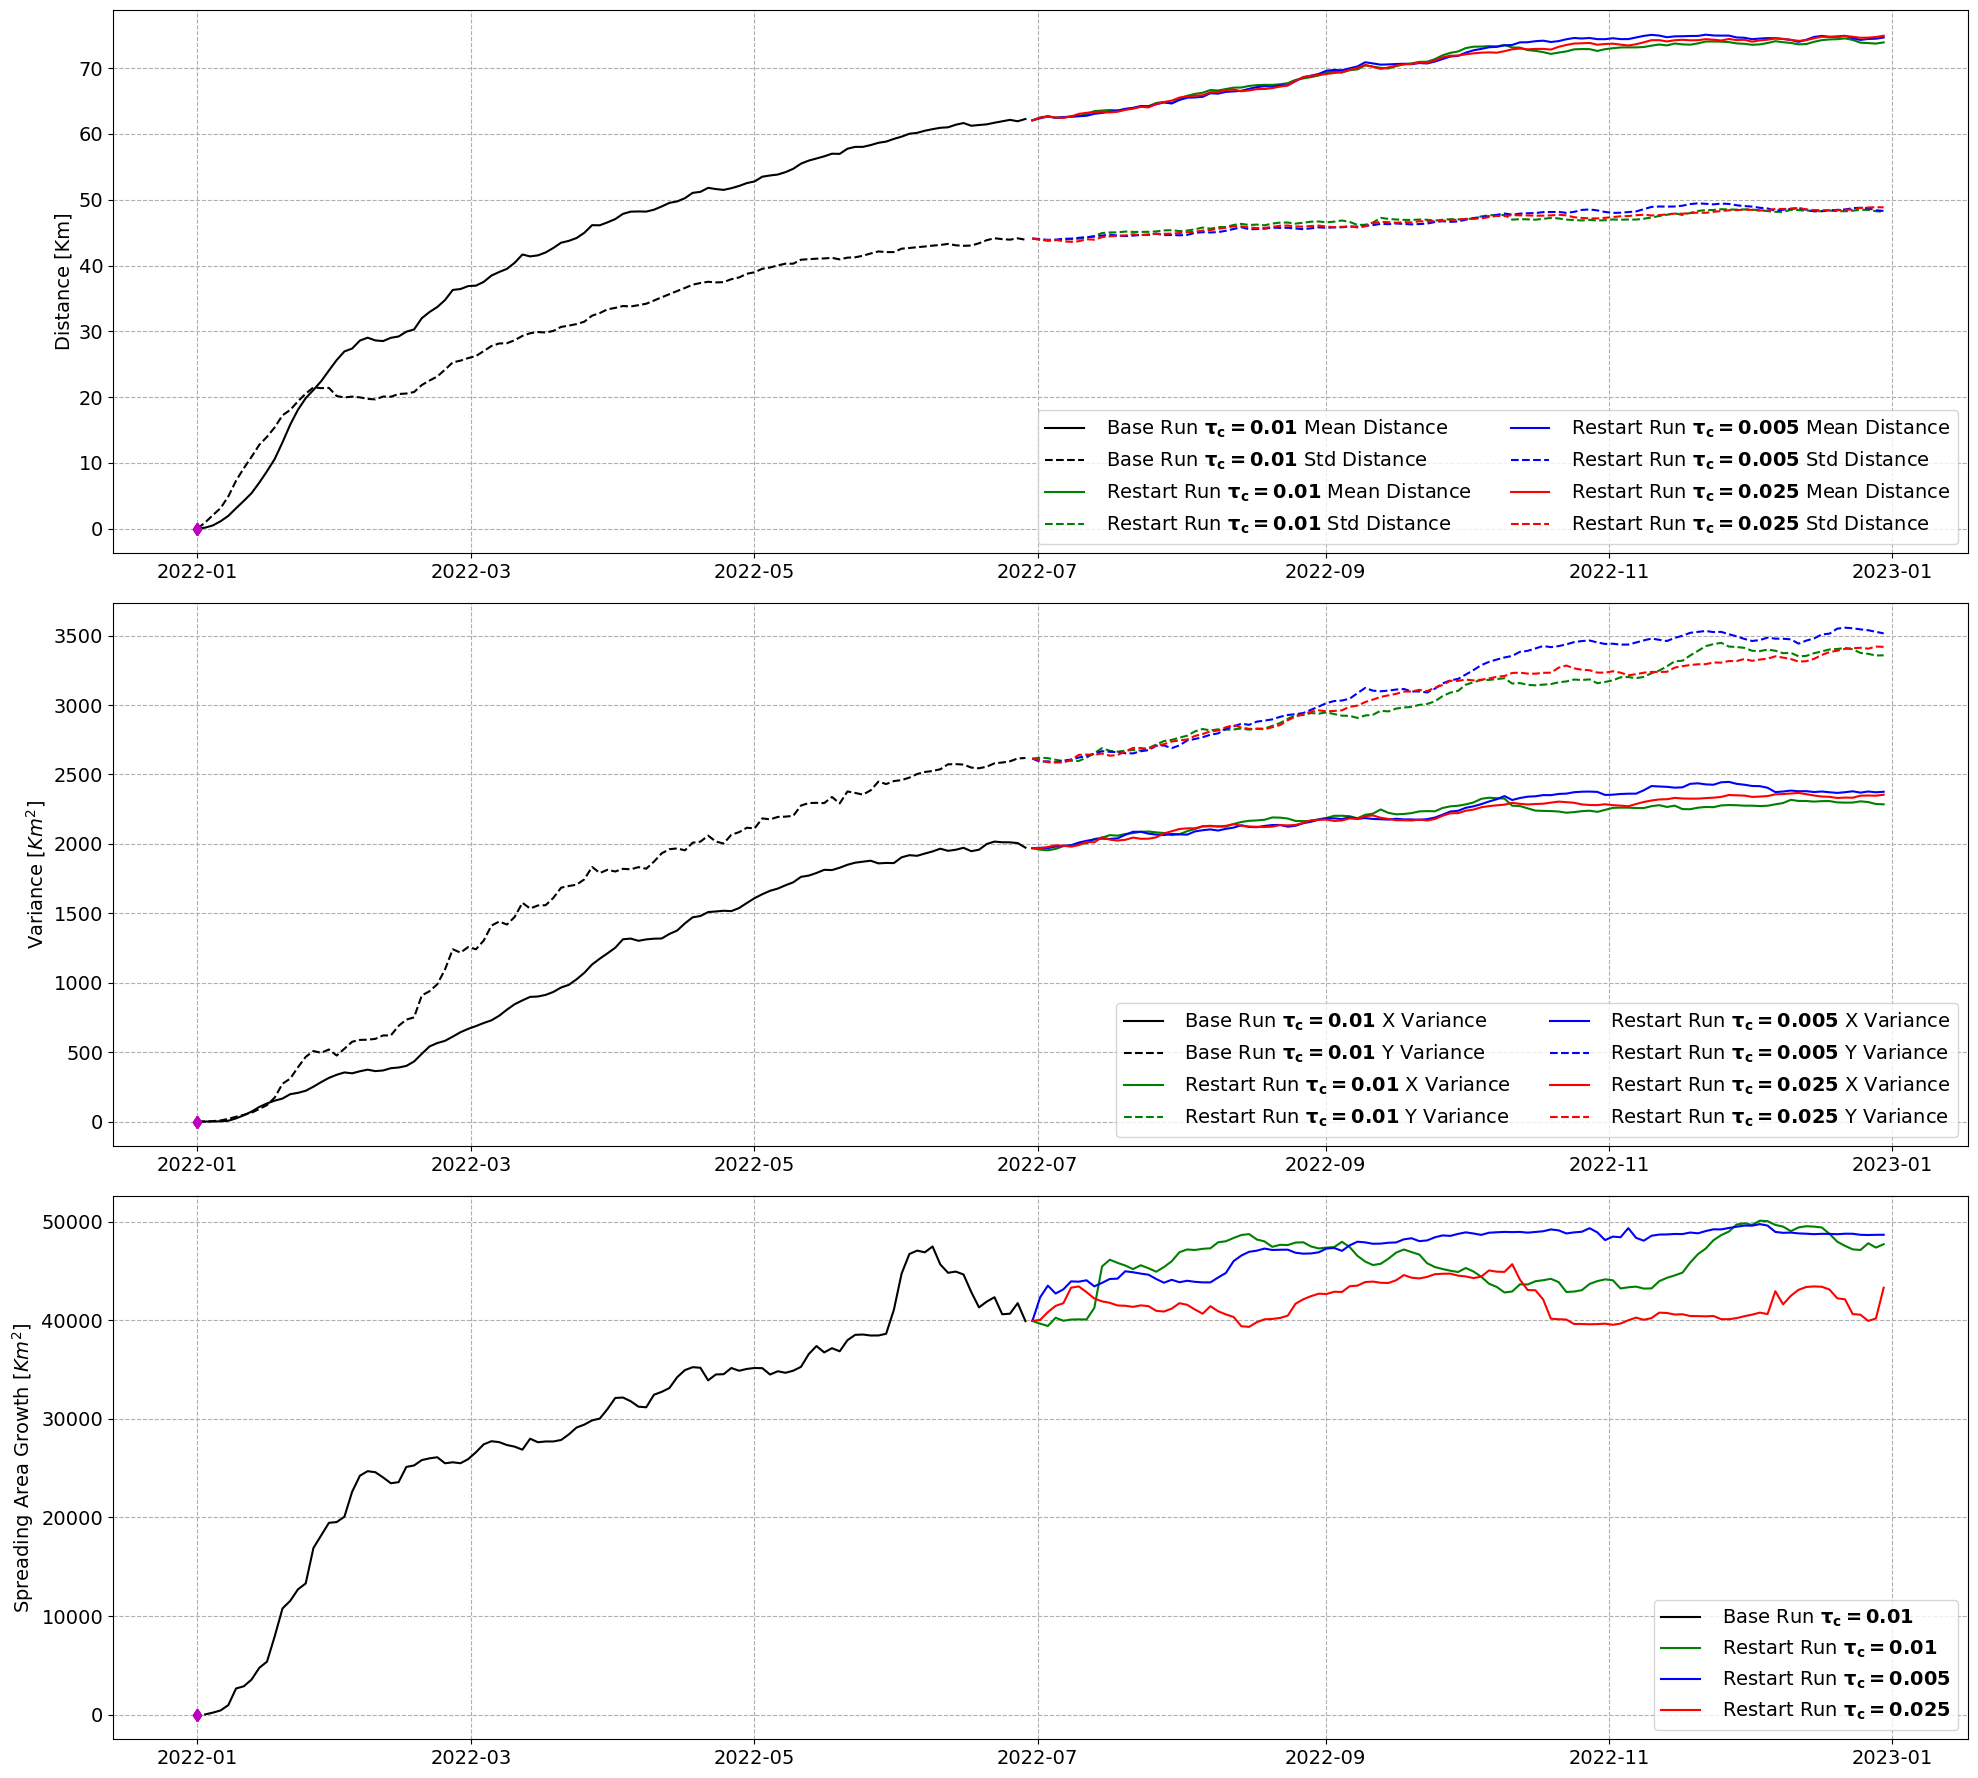

In [29]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
runs = [spread_data_base, spread_data_R1, spread_data_R2, spread_data_R3]
c = ['k', 'g', 'b', 'r']
labels = [rf" Base Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.005}}$", rf" Restart Run $\bf{{\tau_c = 0.025}}$"]
#
for n in range(0,len(runs)):
    ax[0].plot(runs[n]['mean_distance_km'], '-', color = c[n], label = labels[n] + ' Mean Distance')
    ax[0].plot(runs[n]['std_distance_km'], '--',  color = c[n], label = labels[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(runs[n]['var_x_km2'], '-', color = c[n], label = labels[n] + ' X Variance')
    ax[1].plot(runs[n]['var_y_km2'], '--', color = c[n], label = labels[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(runs[n]['convex_hull_area_km2'], color = c[n],  label = labels[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(runs[0].index[0], 0, 'dm')
    ax[1].plot(runs[0].index[0], 0, 'dm')
    ax[2].plot(runs[0].index[0], 0, 'dm')
plt.tight_layout()

Now for the sediment

In [30]:
def spreading_over_time_by_status(
    filename, source_lon, source_lat,
    tt_step=100, utm_epsg='EPSG:32610'
):
    from geopy.distance import geodesic
    from scipy.spatial import ConvexHull
    from pyproj import Transformer
#
    data = xr.open_dataset(filename)
    lons = data.lon.values
    lats = data.lat.values
    status = data.status.values
    time = data.time[0, :].values

    results_water = []
    results_sediment = []

    transformer = Transformer.from_crs("EPSG:4326", utm_epsg, always_xy=True)
    n_obs = lons.shape[1]

    for tt in range(0, n_obs, tt_step):
        for label, results_list, valid_status in [
            ("water", results_water, [1, 2, 3]),
            ("sediment", results_sediment, [11, 12, 13])
        ]:
            lon_t = lons[:, tt]
            lat_t = lats[:, tt]
            status_t = status[:, tt]

            valid = (
                ~np.isnan(lon_t) & 
                ~np.isnan(lat_t) & 
                np.isin(status_t, valid_status)
            )
            if np.count_nonzero(valid) < 3:
                continue

            lon_t = lon_t[valid]
            lat_t = lat_t[valid]

            # Compute distance from source (in km)
            distances_km = np.array([
                geodesic((source_lat, source_lon), (lat, lon)).km
                for lat, lon in zip(lat_t, lon_t)
            ])
            mean_dist = np.mean(distances_km)
            std_dist = np.std(distances_km)

            # Project to UTM (convert to km)
            x_m, y_m = transformer.transform(lon_t, lat_t)
            x_km = np.array(x_m) / 1000
            y_km = np.array(y_m) / 1000

            var_x = np.var(x_km)
            var_y = np.var(y_km)

            coords = np.stack([x_km, y_km], axis=1)

            try:
                hull = ConvexHull(coords)
                hull_area = hull.volume  # volume in 2D = area
            except Exception:
                hull_area = np.nan

            results_list.append({
                'time': time[tt],
                'mean_distance_km': mean_dist,
                'std_distance_km': std_dist,
                'var_x_km2': var_x,
                'var_y_km2': var_y,
                'convex_hull_area_km2': hull_area
            })

    df_water = pd.DataFrame(results_water).set_index('time')
    df_sediment = pd.DataFrame(results_sediment).set_index('time')
    return df_water, df_sediment


In [31]:
spread_data_base_water, spread_data_base_sediment = spreading_over_time_by_status(filename=restart_files_half_year[0],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R1_water, spread_data_R1_sediment = spreading_over_time_by_status(filename=restart_files_half_year[1],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R2_water, spread_data_R2_sediment = spreading_over_time_by_status(filename=restart_files_half_year[2],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)
#
spread_data_R3_water, spread_data_R3_sediment = spreading_over_time_by_status(filename=restart_files_half_year[3],
                                  source_lon=lon_source, source_lat=lat_source, tt_step=10)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

Just In the water column

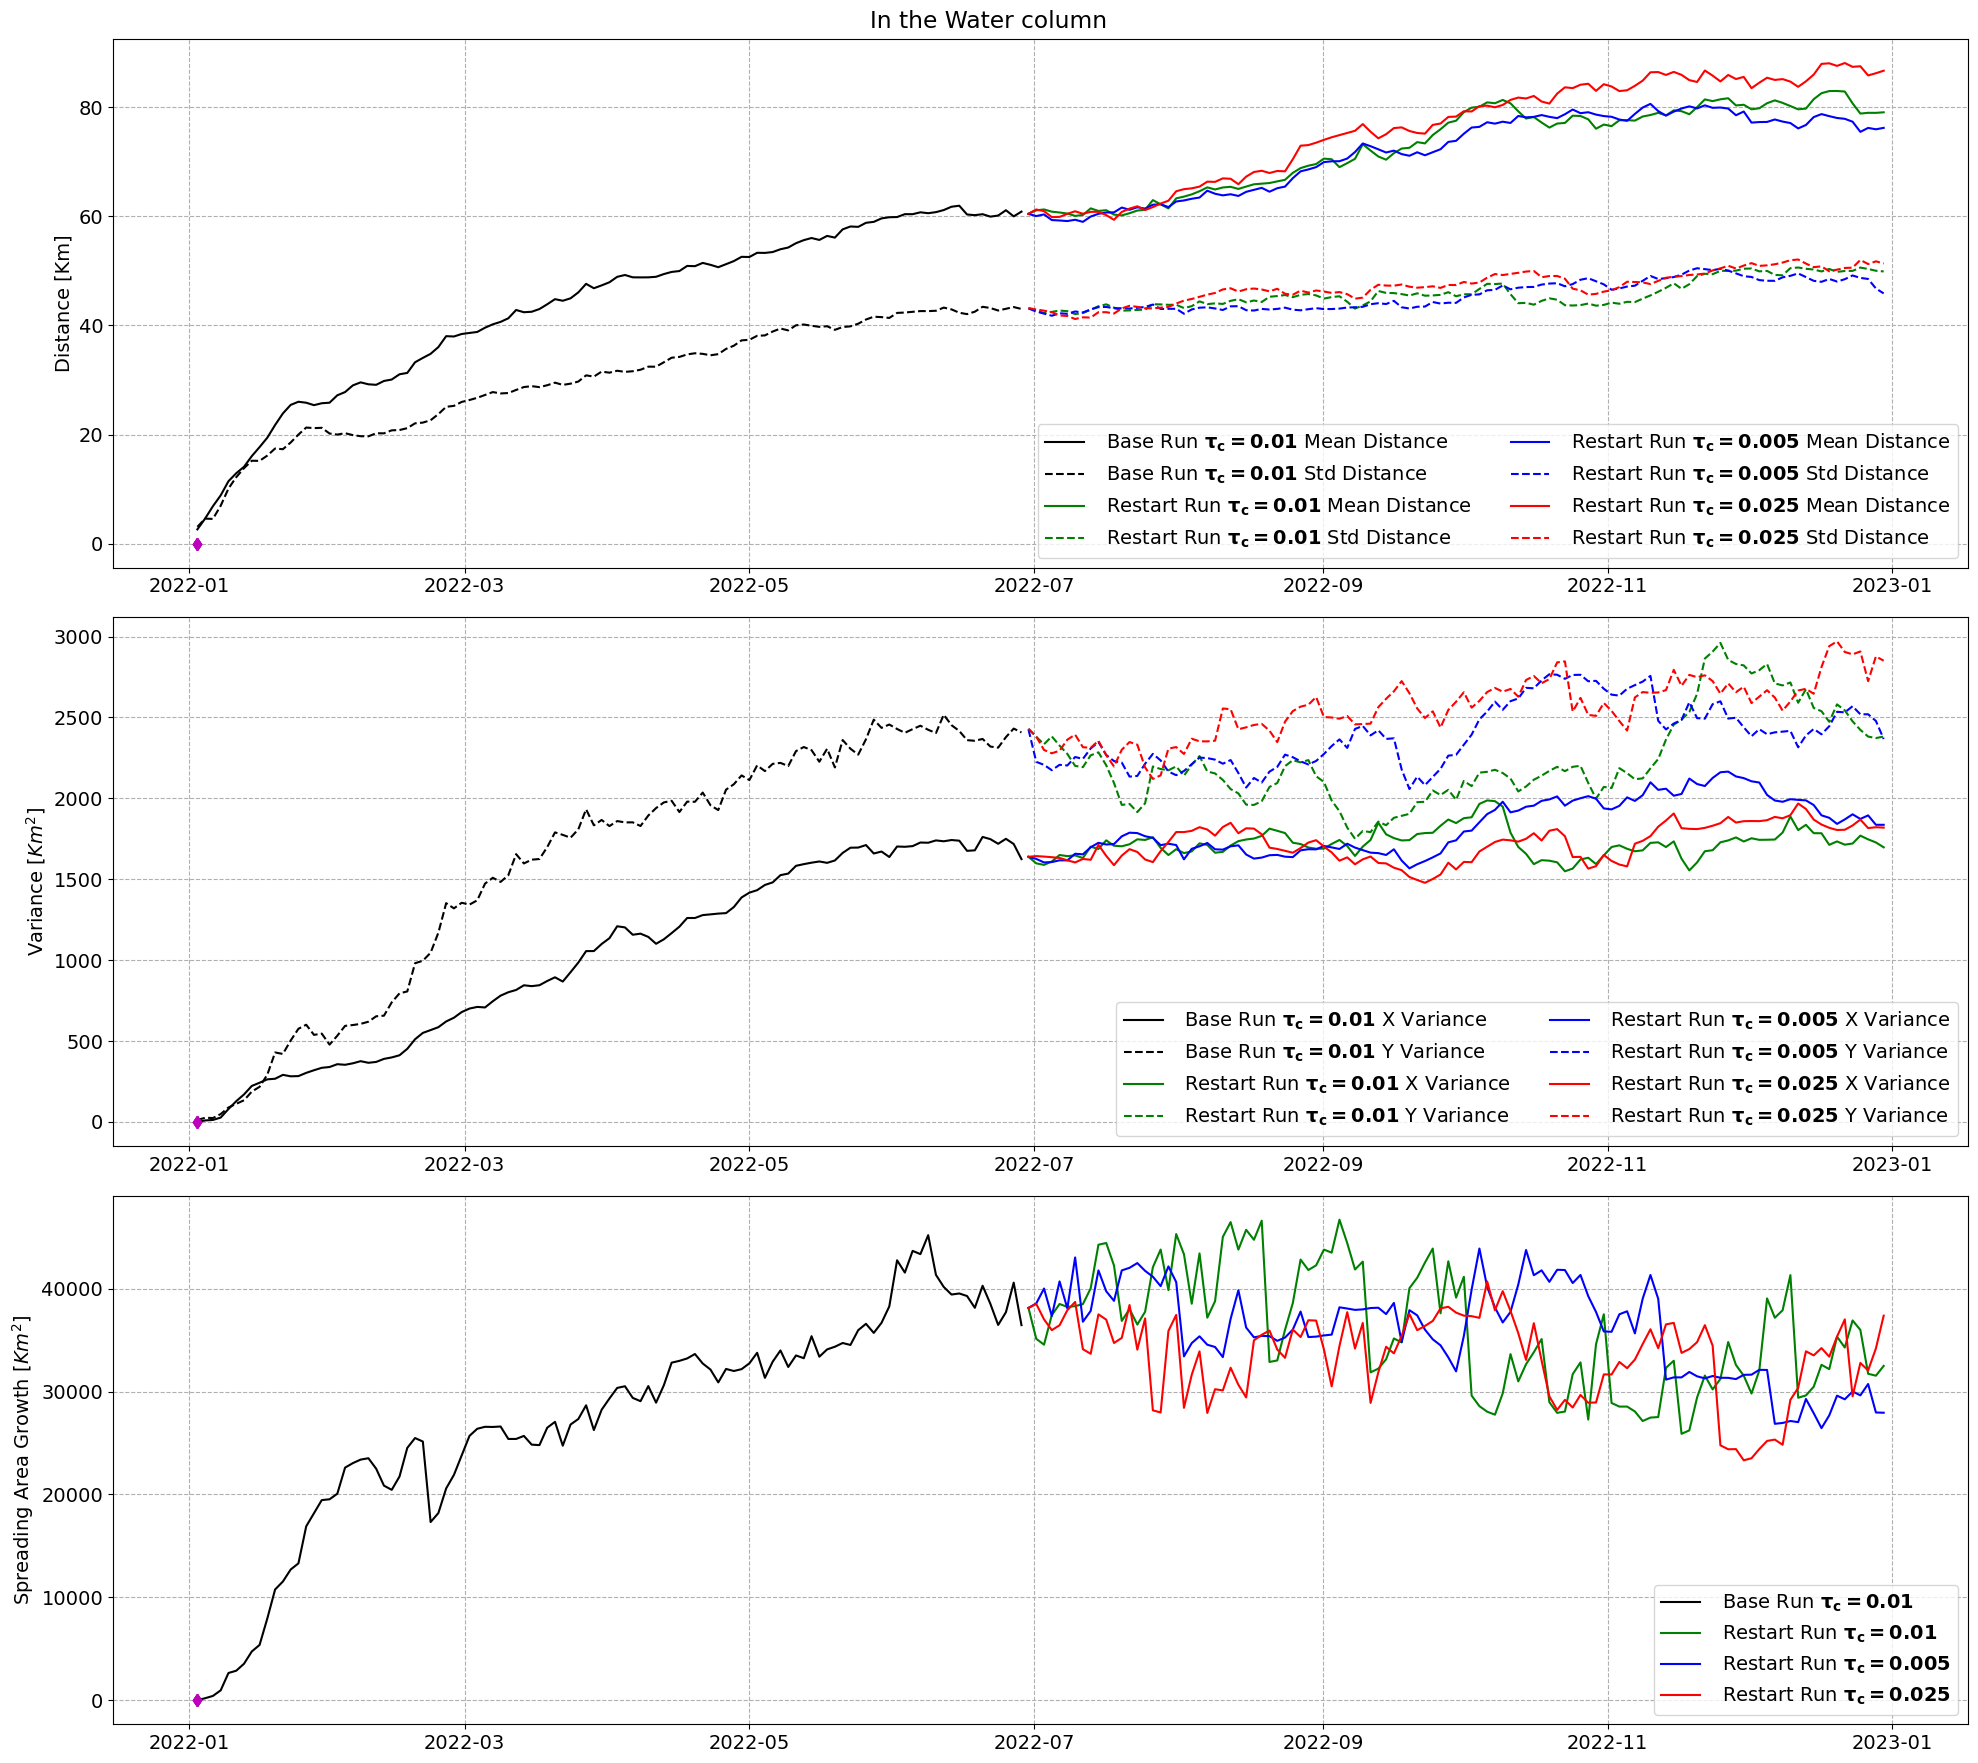

In [32]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
runs_water = [spread_data_base_water, spread_data_R1_water, spread_data_R2_water, spread_data_R3_water]
c = ['k', 'g', 'b', 'r']
labels = [rf" Base Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.005}}$", rf" Restart Run $\bf{{\tau_c = 0.025}}$"]
#
for n in range(0,len(runs_water)):
    ax[0].plot(runs_water[n]['mean_distance_km'], '-', color = c[n], label = labels[n] + ' Mean Distance')
    ax[0].plot(runs_water[n]['std_distance_km'], '--',  color = c[n], label = labels[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(runs_water[n]['var_x_km2'], '-', color = c[n], label = labels[n] + ' X Variance')
    ax[1].plot(runs_water[n]['var_y_km2'], '--', color = c[n], label = labels[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(runs_water[n]['convex_hull_area_km2'], color = c[n],  label = labels[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(runs_water[0].index[0], 0, 'dm')
    ax[1].plot(runs_water[0].index[0], 0, 'dm')
    ax[2].plot(runs_water[0].index[0], 0, 'dm')
plt.suptitle('In the Water column')    
plt.tight_layout()

Now just in the sediment

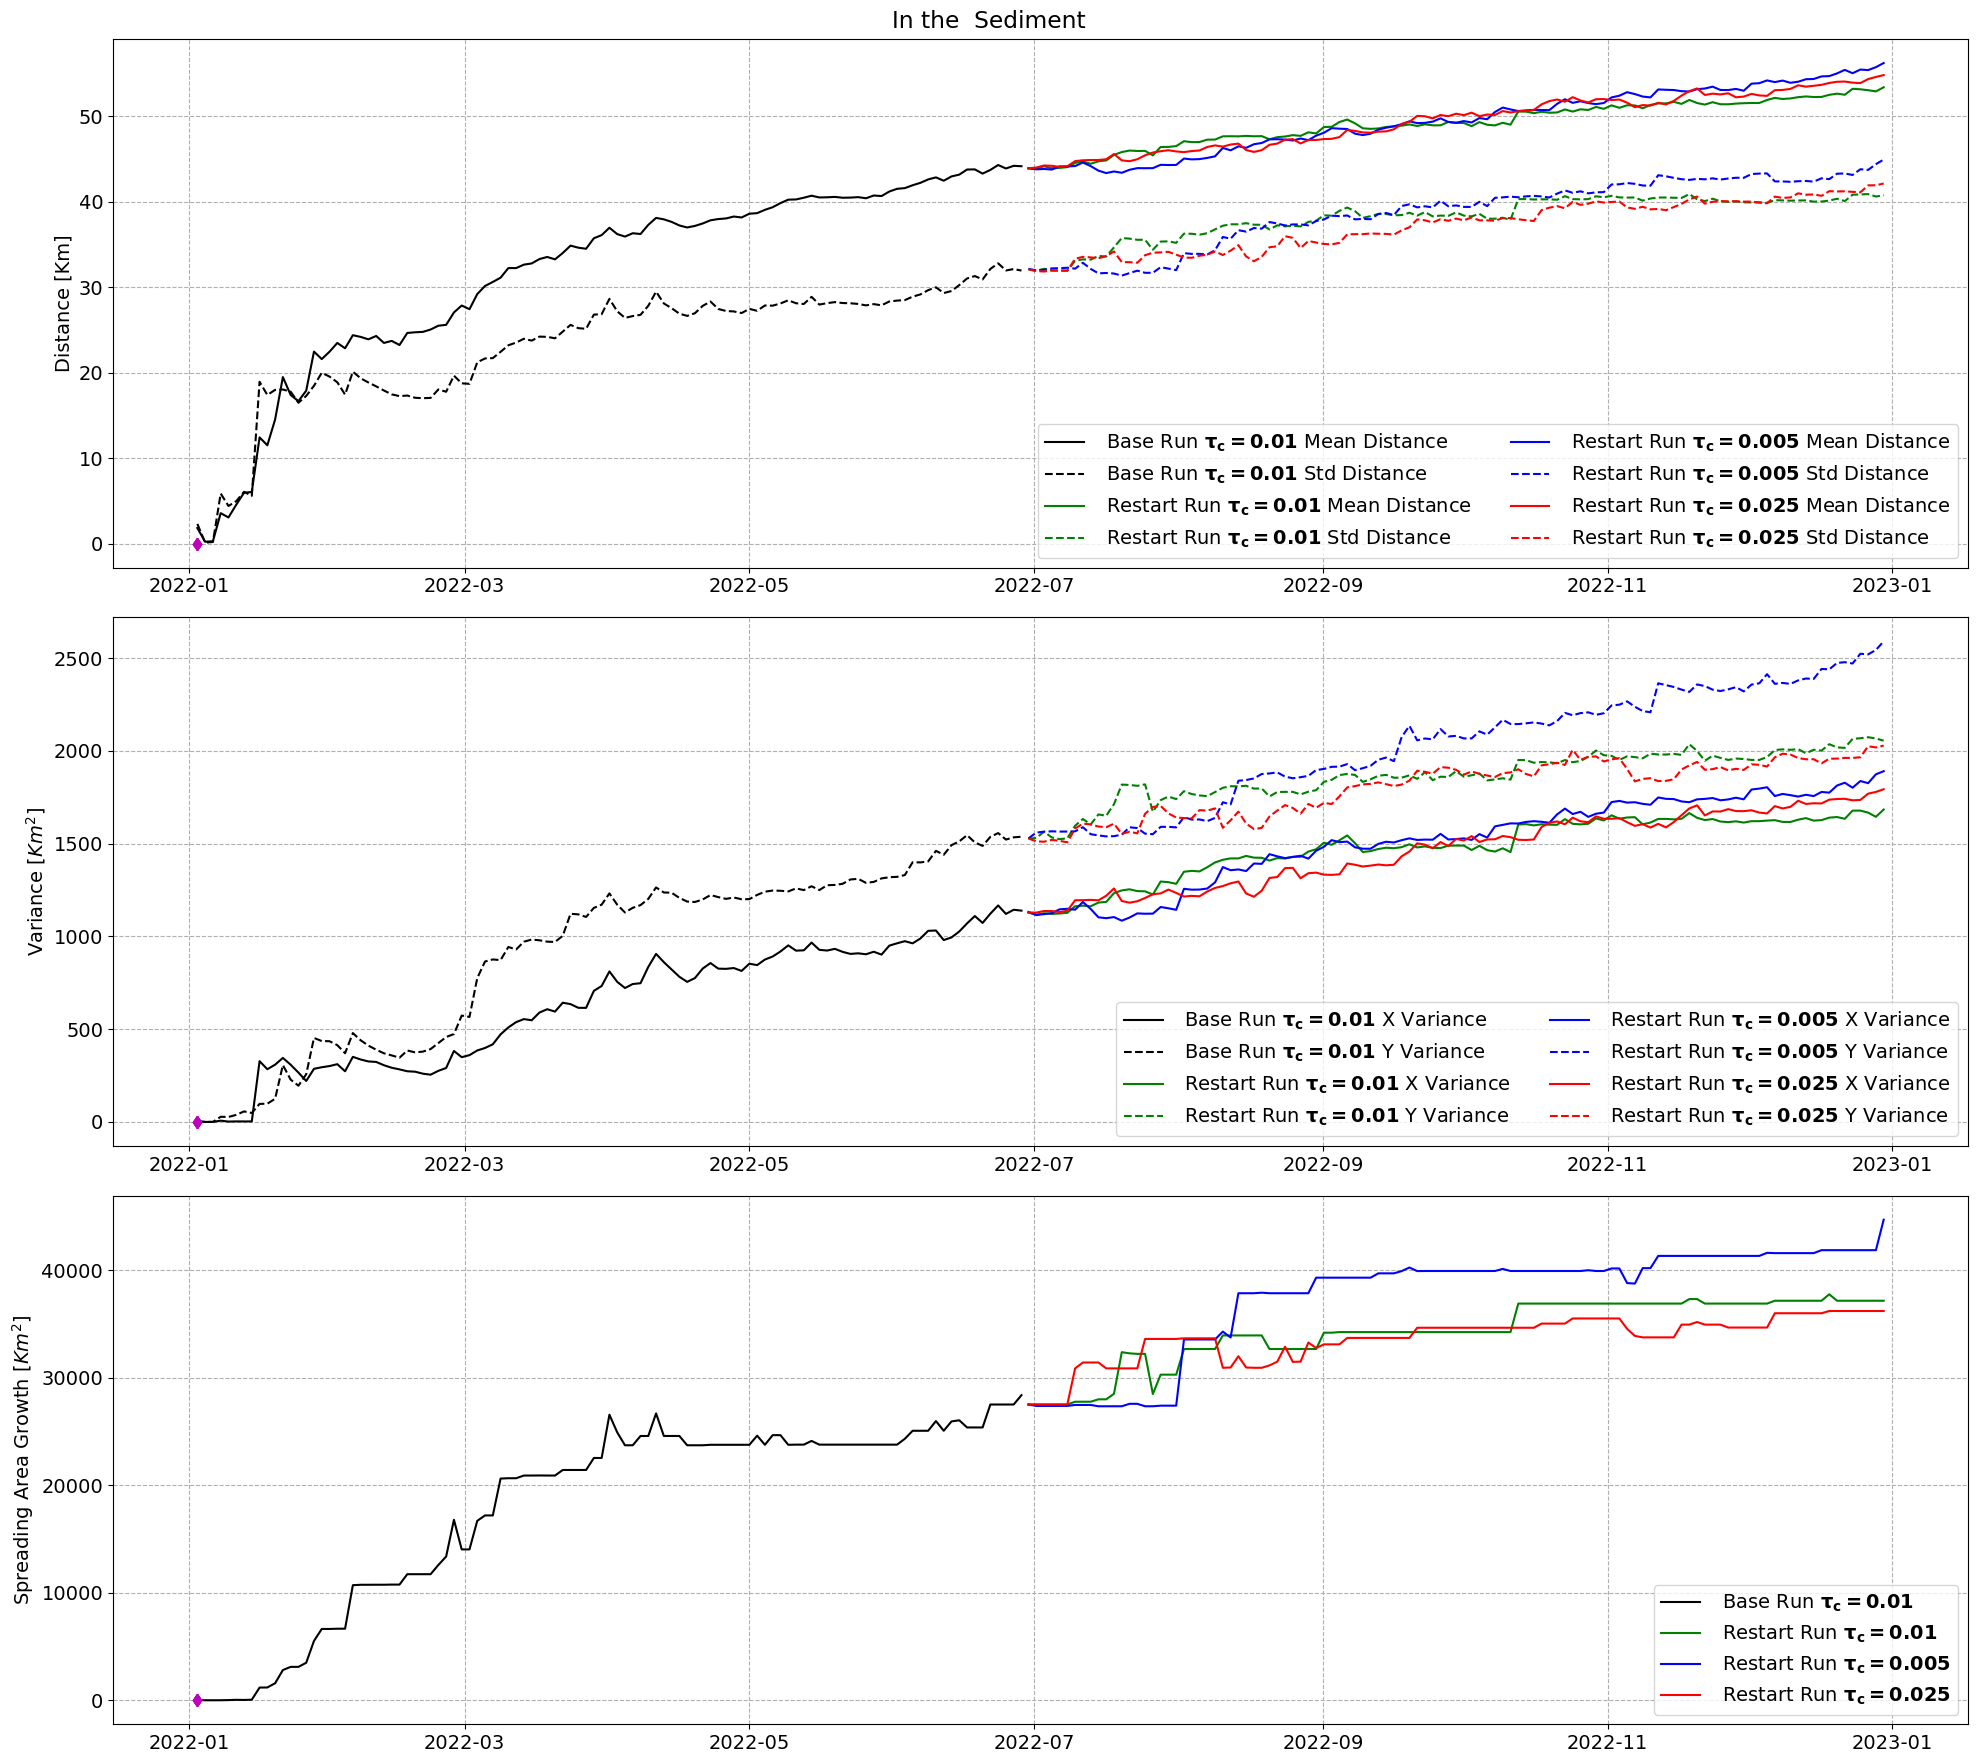

In [33]:
fig, ax = plt.subplots(3,1,figsize = (20, 18))
#
runs_sediment = [spread_data_base_sediment, spread_data_R1_sediment, spread_data_R2_sediment, spread_data_R3_sediment]
c = ['k', 'g', 'b', 'r']
labels = [rf" Base Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.01}}$", rf" Restart Run $\bf{{\tau_c = 0.005}}$", rf" Restart Run $\bf{{\tau_c = 0.025}}$"]
#
for n in range(0,len(runs_sediment)):
    ax[0].plot(runs_sediment[n]['mean_distance_km'], '-', color = c[n], label = labels[n] + ' Mean Distance')
    ax[0].plot(runs_sediment[n]['std_distance_km'], '--',  color = c[n], label = labels[n] + ' Std Distance')
    ax[0].set_ylabel('Distance [Km]')
    ax[0].legend(ncol=2, loc = 'lower right')
    ax[0].grid(linestyle = '--')
    #
    ax[1].plot(runs_sediment[n]['var_x_km2'], '-', color = c[n], label = labels[n] + ' X Variance')
    ax[1].plot(runs_sediment[n]['var_y_km2'], '--', color = c[n], label = labels[n] + ' Y Variance')
    ax[1].set_ylabel(r'Variance [$Km^{2}$]')
    ax[1].legend(ncol=2, loc = 'lower right')
    ax[1].grid(linestyle = '--')
    #
    ax[2].plot(runs_sediment[n]['convex_hull_area_km2'], color = c[n],  label = labels[n])
    ax[2].set_ylabel(r'Spreading Area Growth [$Km^{2}$]')
    ax[2].legend(loc = 'lower right')
    ax[2].grid(linestyle = '--')
    #
    ax[0].plot(runs_sediment[0].index[0], 0, 'dm')
    ax[1].plot(runs_sediment[0].index[0], 0, 'dm')
    ax[2].plot(runs_sediment[0].index[0], 0, 'dm')
plt.suptitle('In the  Sediment')    
plt.tight_layout()

# Half a year run + abso different runs

In [34]:
half_year_runs_abso = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_180_days_half_year.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_tau_0_01.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_abso_40_not_60.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/RESTART_runs/PBDE_particles_for_0112022_run_180_days_half_year_restart_185_days_abso_80_not_60.zarr']
#
colors = ['k', 'b', 'g', 'r']
labels_abso=['Base Run', 'Abso: (*) / 60', 'Abso: (*) / 40', 'Abso: (*) / 80']

In [35]:
run_abso_0 = number_particles(filename = half_year_runs_abso[0])
run_abso_1 = number_particles(filename = half_year_runs_abso[1])
run_abso_2 = number_particles(filename = half_year_runs_abso[2])
run_abso_3 = number_particles(filename = half_year_runs_abso[3])
abso_water_0, abso_sediment_0 =  run_abso_0['sewage_water'] + run_abso_0['colloidal_water'] + run_abso_0['marine_water'] , run_abso_0['sewage_sediment'] + run_abso_0['colloidal_sediment'] + run_abso_0['marine_sediment']
abso_water_1, abso_sediment_1 =  run_abso_1['sewage_water'] + run_abso_1['colloidal_water'] + run_abso_1['marine_water'] , run_abso_1['sewage_sediment'] + run_abso_1['colloidal_sediment'] + run_abso_1['marine_sediment']
abso_water_2, abso_sediment_2 =  run_abso_2['sewage_water'] + run_abso_2['colloidal_water'] + run_abso_2['marine_water'] , run_abso_2['sewage_sediment'] + run_abso_2['colloidal_sediment'] + run_abso_2['marine_sediment']
abso_water_3, abso_sediment_3 =  run_abso_3['sewage_water'] + run_abso_3['colloidal_water'] + run_abso_3['marine_water'] , run_abso_3['sewage_sediment'] + run_abso_3['colloidal_sediment'] + run_abso_3['marine_sediment']

Text(0, 0.5, 'Number of Particles in the sediment')

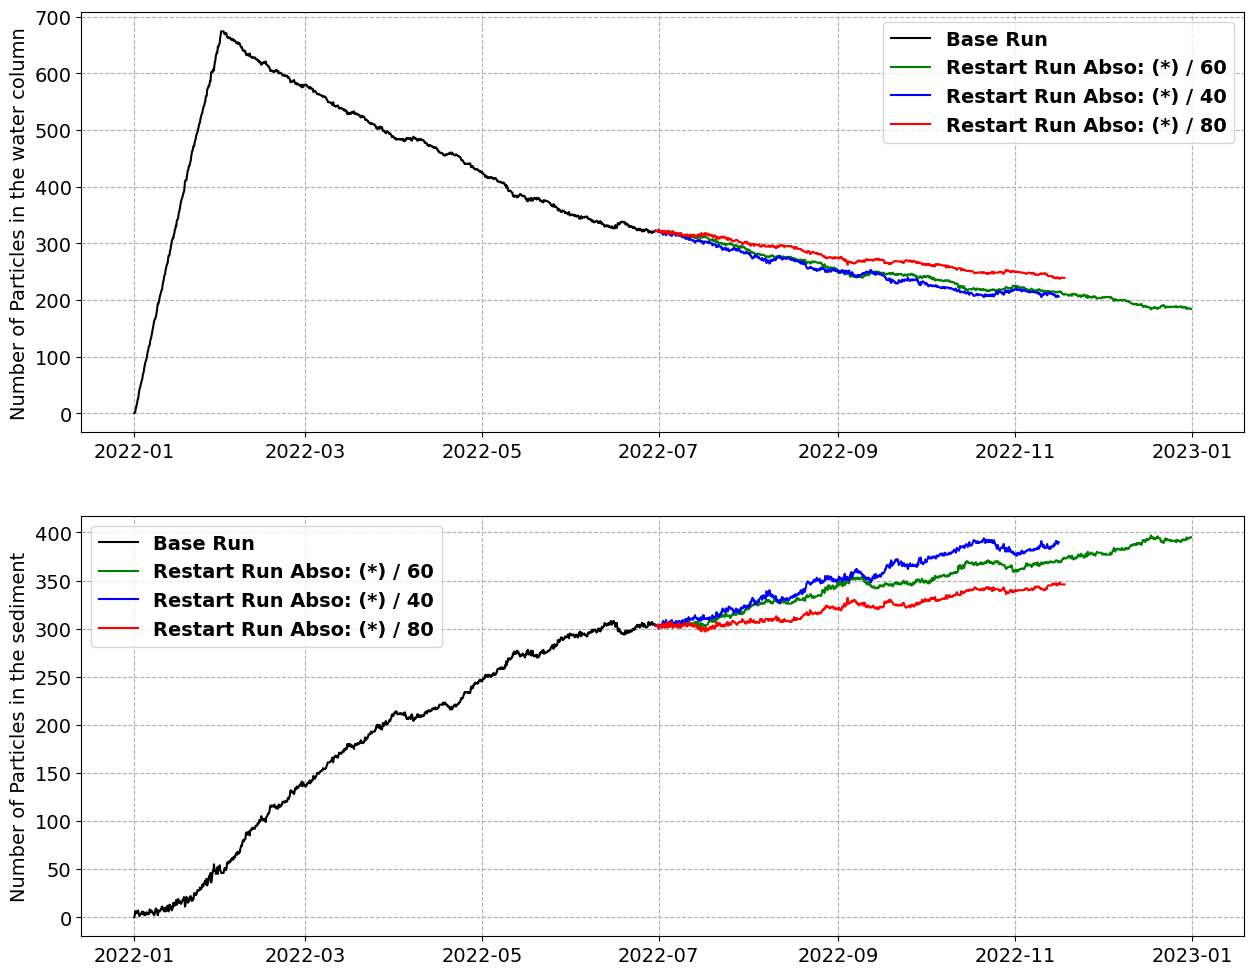

In [36]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2,1,figsize = (15,12))
ax[0].plot(abso_water_0, 'k', label =labels_abso[0])
ax[0].plot(abso_water_1, 'g', label = 'Restart Run ' + labels_abso[1])
ax[0].plot(abso_water_2, 'b', label = 'Restart Run ' + labels_abso[2])
ax[0].plot(abso_water_3, 'r', label = 'Restart Run ' + labels_abso[3])
#
ax[0].grid(linestyle = '--')
ax[0].legend(prop={'weight': 'bold'})
ax[0].set_ylabel('Number of Particles in the water column')
##########################################################################
#
ax[1].plot(abso_sediment_0, 'k', label =labels_abso[0])
ax[1].plot(abso_sediment_1, 'g', label = 'Restart Run ' + labels_abso[1])
ax[1].plot(abso_sediment_2, 'b', label = 'Restart Run ' + labels_abso[2])
ax[1].plot(abso_sediment_3, 'r', label = 'Restart Run ' + labels_abso[3])
#
ax[1].grid(linestyle = '--')
ax[1].legend(prop={'weight': 'bold'})
ax[1].set_ylabel('Number of Particles in the sediment')